In [2]:
import torch
import torch.nn as nn
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [3]:
class linear_model(torch.nn.Module):
    def __init__(self):
        super(linear_model, self).__init__()
        self.layer1 = nn.Linear(2,1, bias = 0)
    def forward(self,x):
        y_predicted=self.layer1(x) 
        return y_predicted

In [4]:
model = linear_model()

In [5]:
for p in model.parameters():
    print(p)
nn.init.constant_(p, 0)

Parameter containing:
tensor([[-0.3560, -0.6169]], requires_grad=True)


Parameter containing:
tensor([[0., 0.]], requires_grad=True)

In [38]:
X = np.array([[0.05, 0.03], [0.05, -0.03], [-0.1, 1], [0.1,1]])
index = [0, 1, 2, 3]
prob = [0.05, 0.05,0.45, 0.45 ]
y = np.array([[1], [1], [1], [1]])

In [39]:
plt.ylim?

In [40]:
X

array([[ 0.05,  0.03],
       [ 0.05, -0.03],
       [-0.1 ,  1.  ],
       [ 0.1 ,  1.  ]])

In [41]:
X

array([[ 0.05,  0.03],
       [ 0.05, -0.03],
       [-0.1 ,  1.  ],
       [ 0.1 ,  1.  ]])

In [66]:
plt.rcParams['text.usetex'] = True

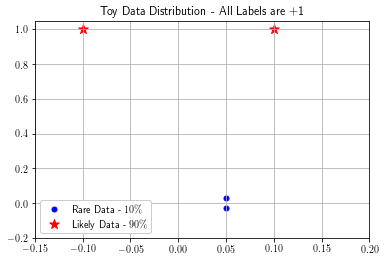

In [70]:
plt.scatter(X[:, 0][:2], X[:, 1][:2], c='b', marker='.', s = 100, label = "Rare Data - $10\%$")
plt.scatter(X[:, 0][2:], X[:, 1][2:], c='r', marker='*', s = 100, label = "Likely Data - $90\%$")

plt.yticks(np.arange(-0.2, 1.1, 0.2))
plt.xticks(np.arange(-0.15, 0.25, 0.05))
plt.grid()
plt.legend(loc=3, framealpha=1)
plt.title("Toy Data Distribution - All Labels are +1")
plt.savefig("Toy.pdf")

In [71]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [72]:
criterion = nn.BCEWithLogitsLoss()

## Stochastic Gradient Descent

In [74]:
https://ethz.zoom.us/j/61441909426
iterate_cycle = []

for i in range(100):
    for p in model.parameters():
        nn.init.constant_(p, 0)

    iterates = []
    indices = []

    for epoch in range(400):
        optimizer.zero_grad()
        ix = np.random.choice(index, p = prob)
        preds = model(torch.tensor(X[ix].reshape(-1, 2)).float())
        loss = criterion( preds, torch.tensor(y[ix].reshape(-1, 1)).float())
        loss.backward()
        optimizer.step()
        indices.append(ix)
        for p in model.parameters():
            v = p.detach().numpy()
            iterates.append(deepcopy(v))
    iterate_cycle.append(iterates)

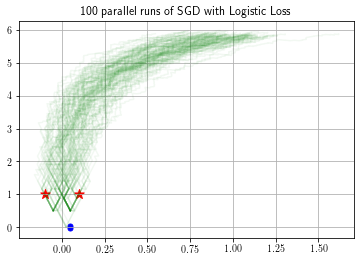

In [109]:
for i in range(100):
    new_list = []
    for elem in iterate_cycle[i]:
        new_list.append(list(elem[0]))
    new_iterates = np.array(new_list)
    plt.plot(new_iterates[:, 0], new_iterates[:, 1], c='g', alpha=0.05)
plt.grid()
plt.scatter(X[:, 0][:2], X[:, 1][:2], c='b', marker='.', s = 100, label = "Rare Data - $10\%$")
plt.scatter(X[:, 0][2:], X[:, 1][2:], c='r', marker='*', s = 100, label = "Likely Data - $90\%$")
plt.title("100 parallel runshttps://ethz.zoom.us/j/61441909426
 of SGD with Logistic Loss")
plt.savefig("Toy_log_sgd.pdf")
# plt.plot(new_iterates_1[:, 0], new_iterates_1[:, 1])

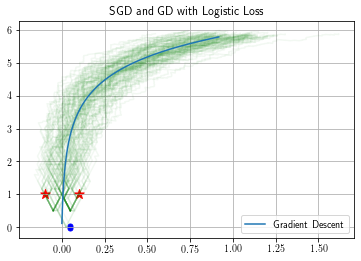

In [110]:
for i in range(100):
    new_list = []
    for elem in iterate_cycle[i]:
        new_list.append(list(elem[0]))
    new_iterates = np.array(new_list)
    plt.plot(new_iterates[:, 0], new_iterates[:, 1], c='g', alpha=0.05)
plt.grid()
plt.scatter(X[:, 0][:2], X[:, 1][:2], c='b', marker='.', s = 100 )
plt.scatter(X[:, 0][2:], X[:, 1][2:], c='r', marker='*', s = 100 )
plt.title("SGD and GD with Logistic Loss")
plt.plot(new_iterates_1[:, 0][:1500], new_iterates_1[:, 1][:1500], label = "Gradient Descent")
plt.legend()
plt.savefig("Toy_log_sgd_gd.pdf")

In [131]:
plt.arrow?

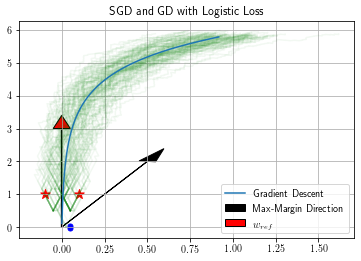

In [141]:
for i in range(100):
    new_list = []
    for elem in iterate_cycle[i]:
        new_list.append(list(elem[0]))
    new_iterates = np.array(new_list)
    plt.plot(new_iterates[:, 0], new_iterates[:, 1], c='g', alpha=0.05)
plt.grid()
plt.scatter(X[:, 0][:2], X[:, 1][:2], c='b', marker='.', s = 100 )
plt.scatter(X[:, 0][2:], X[:, 1][2:], c='r', marker='*', s = 100 )
plt.title("SGD and GD with Logistic Loss")
plt.plot(new_iterates_1[:, 0][:1500], new_iterates_1[:, 1][:1500], label = "Gradient Descent")
plt.arrow(0, 0, 0.5, 2, head_length = 0.4, head_width=0.1, facecolor='black', label = 'Max-Margin Direction')
# plt.savefig("toy_sgd_gd_squared_optimal_arrow.pdf")
plt.arrow(0, 0, 0, 3, head_length = 0.4, head_width=0.1, label = '$w_{ref}$', width=0.005, facecolor='red')
plt.legend()
plt.savefig("toy_sgd_gd_arrow_wref_log.pdf")
# plt.legend()
# 


## Population Gradient Descent

In [82]:
X

array([[ 0.05,  0.03],
       [ 0.05, -0.03],
       [-0.1 ,  1.  ],
       [ 0.1 ,  1.  ]])

In [91]:
gd_criterion = nn.BCEWithLogitsLoss(reduction='none')

In [92]:
gd_model = linear_model()

for p in gd_model.parameters():
    print(p)
nn.init.constant_(p, 0)

Parameter containing:
tensor([[-0.4465, -0.1680]], requires_grad=True)


Parameter containing:
tensor([[0., 0.]], requires_grad=True)

In [93]:
gd_optimizer = torch.optim.SGD(gd_model.parameters(), lr=1)

In [94]:
weights = torch.tensor([[0.05, 0.05, 0.45, 0.45]]).reshape(-1, 1)

In [95]:
iterates = []
indices = []

for epoch in range(2000):
    gd_optimizer.zero_grad()
    preds = gd_model(torch.tensor(X).float())
    loss = gd_criterion( preds, torch.tensor(y.reshape(-1, 1)).float())
    loss_new = loss * weights
    loss_f = torch.mean(loss_new)
    loss_f.backward()
    gd_optimizer.step()
    indices.append(ix)
    for p in gd_model.parameters():
        v = p.detach().numpy()
        iterates.append(deepcopy(v))

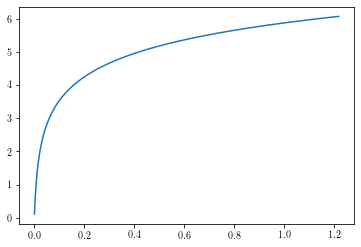

In [96]:
new_list_1 = []
for elem in iterates:
    new_list_1.append(list(elem[0]))
new_iterates_1 = np.array(new_list_1)
plt.plot(new_iterates_1[:, 0], new_iterates_1[:, 1])